# Import Library

In [1]:
## import library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)

# Load dataset

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.shape

(41188, 21)

In [5]:
## check missing value
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
## describe data
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


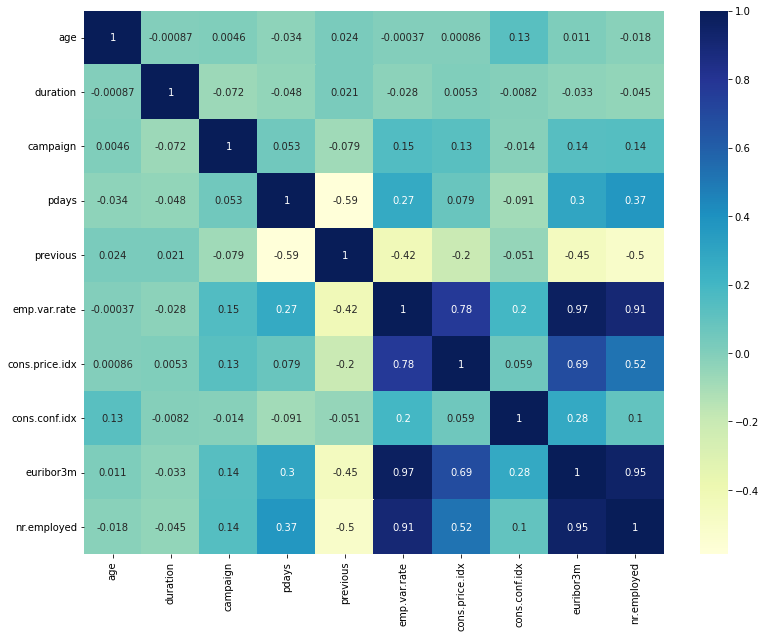

In [7]:
## viz the data correlation using heatmap
plt.subplots(figsize=(13,10))
sb.heatmap(bank.corr(), annot=True, cmap='YlGnBu')

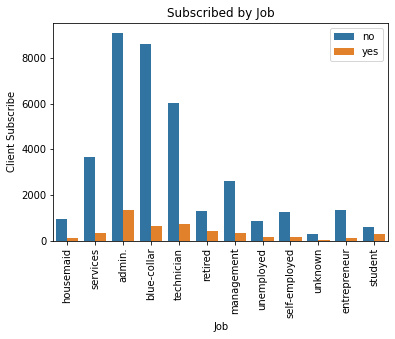

In [8]:
sb.color_palette("coolwarm", as_cmap=True)
sb.countplot(x='job', hue='y', data=bank)
plt.xlabel('Job')
plt.ylabel('Client Subscribe')
plt.title('Subscribed by Job')
plt.xticks(rotation=90)
plt.legend()
plt.show()

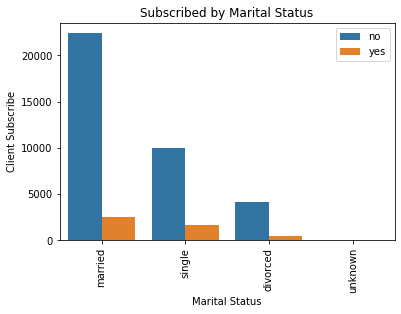

In [9]:
sb.countplot(x='marital', hue='y', data=bank)
plt.xlabel('Marital Status')
plt.ylabel('Client Subscribe')
plt.title('Subscribed by Marital Status')
plt.xticks(rotation=90)
plt.legend()
plt.show()

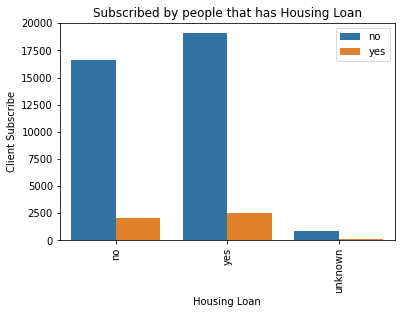

In [10]:
sb.countplot(x='housing', hue='y', data=bank)
plt.xlabel('Housing Loan')
plt.ylabel('Client Subscribe')
plt.title('Subscribed by people that has Housing Loan')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [11]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
## drop data that we dont need
bank = bank.drop(columns=['day_of_week', 'month', 'contact', 'duration', 'poutcome'], axis=1)
bank.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
## show values of each object labels
print('job :')
print(bank['job'].value_counts(), '\n')
print('marital :')
print(bank['marital'].value_counts(), '\n')
print('education :')
print(bank['education'].value_counts(), '\n')
print('credit default :')
print(bank['default'].value_counts(), '\n')
print('housing loan :')
print(bank['housing'].value_counts(), '\n')
print('personal loan :')
print(bank['loan'].value_counts(), '\n')
print('client subscribed :')
print(bank['y'].value_counts(), '\n')

job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

credit default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing loan :
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

personal loan :
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

client subscribe

In [14]:
# replacing object to numeric value using .replace() function

bank["job"] = bank["job"].replace({"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4,
                                  "retired": 5, "entrepreneur": 6, "self-employed": 7, "housemaid": 8, "unemployed": 9, "student": 10, "unknown": 11})
bank["marital"] = bank["marital"].replace(
    {"married": 0, "single": 1, "divorced": 2, "unknown": 3})
bank["education"] = bank["education"].replace({"basic.4y": 0, "basic.6y": 1, "basic.9y": 2,
                                              "high.school": 3, "university.degree": 4, "professional.course": 5, "illiterate": 6, "unknown": 7})
bank["default"] = bank["default"].replace({"no": 0, "yes": 1, "unknown": 2})
bank["housing"] = bank["housing"].replace({"no": 0, "yes": 1, "unknown": 2})
bank["loan"] = bank["loan"].replace({"no": 0, "yes": 1, "unknown": 2})

In [15]:
bank.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,0,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,3,0,3,2,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,3,0,3,0,1,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,1,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,3,0,3,0,0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


# Split Data

In [16]:
x = bank.drop(["y"], axis=1) ## data feature
y = bank["y"] ## data target

In [17]:
# Splitting X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [18]:
# Scale Data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

##### Create the model and Training the model

In [19]:
logreg= LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

##### Evaluate the model

In [20]:
## get the predicted output
y_pred_logreg = logreg.predict(x_test)

##### Get the accuracy score

In [21]:
## accuracy score for data train
logreg.score(x_train, y_train)

0.8992750858450973

In [22]:
## accuracy score for data test
logreg.score(x_test, y_test)

0.8995710933074371

##### Get the confussion matrix and visualize it

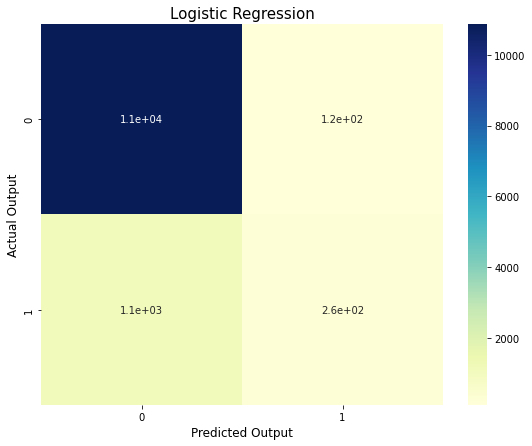

In [23]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_logreg, annot=True, cmap='YlGnBu')
plt.title('Logistic Regression', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

##### Get the classification report

In [24]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_logreg)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.69      0.19      0.29      1382

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



# KNN

##### Calculating the optimal k value and visualize the error rate of each k

In [25]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

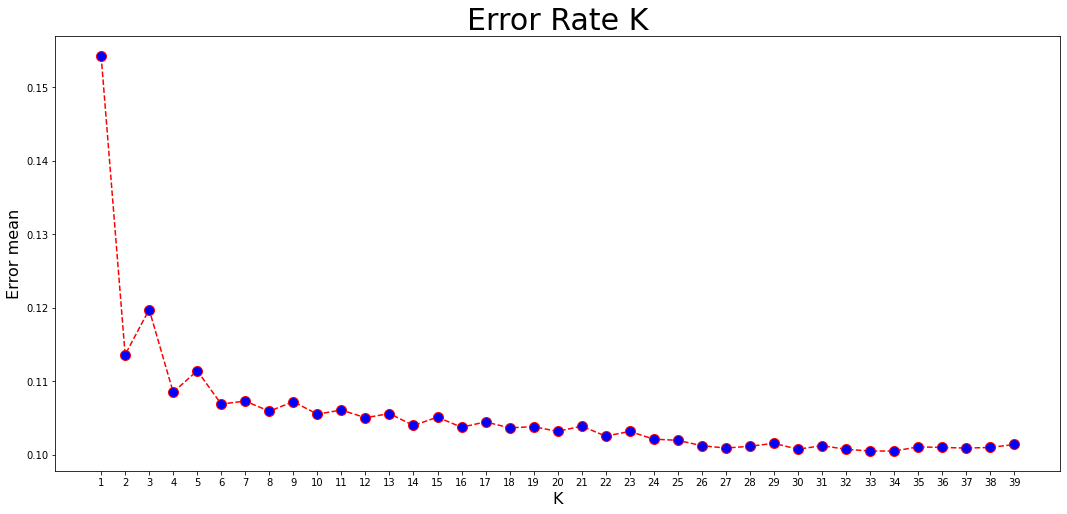

In [26]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K', fontsize=30)
plt.xlabel('K', fontsize=16)
plt.xticks(range(1, 40))
plt.ylabel('Error mean', fontsize=16)

as we can se the smallest error we get is 0.1005 at K = 34

##### Create the model with k=34 and Train it

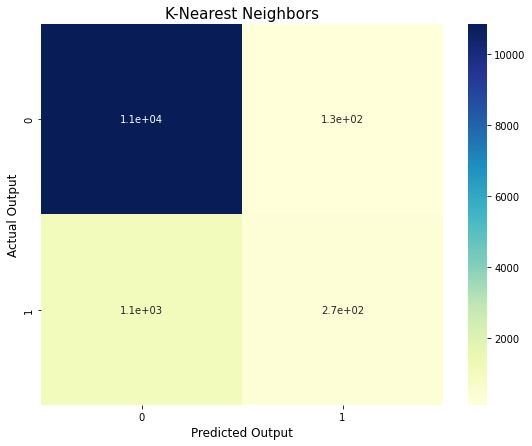

In [27]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_knn, annot=True, cmap='YlGnBu')
plt.title('K-Nearest Neighbors', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

##### Get the accuracy score

In [28]:
knn.score(x_train, y_train)

0.9001768929277514

In [29]:
knn.score(x_test, y_test)

0.8994901675163874

##### Get the classification report

In [30]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_knn)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.67      0.20      0.31      1382

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



# SVM

In [31]:
svm = SVC(kernel='linear')

svm.fit(x_train, y_train)

SVC(kernel='linear')

##### Evaluate the model

In [32]:
## get the predicted output
y_pred_svm = svm.predict(x_test)

##### Get the accuracy score

In [33]:
svm.score(x_train, y_train)

0.8971593076896396

In [34]:
svm.score(x_test, y_test)

0.8983572064416929

##### Get the confusion matrix and visualize it

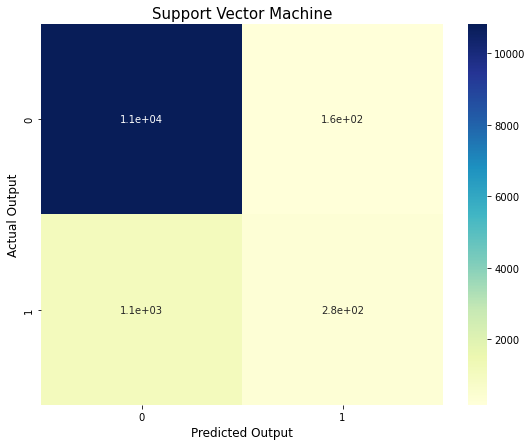

In [35]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_svm, annot=True, cmap='YlGnBu')
plt.title('Support Vector Machine', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

##### Get the classification report

In [36]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_svm)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.64      0.21      0.31      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



# Decision Tree 

##### Create the model and Training the model

In [37]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

##### Evaluate the model

In [38]:
## get the predicted output
y_pred_tree = tree.predict(x_test)

##### Get the accuracy score

In [39]:
## accuracy score for data train
tree.score(x_train, y_train)

0.994554472616281

In [40]:
## accuracy score for data test
tree.score(x_test, y_test)

0.8352350894229991

##### Get the confusion matrix and visualize it

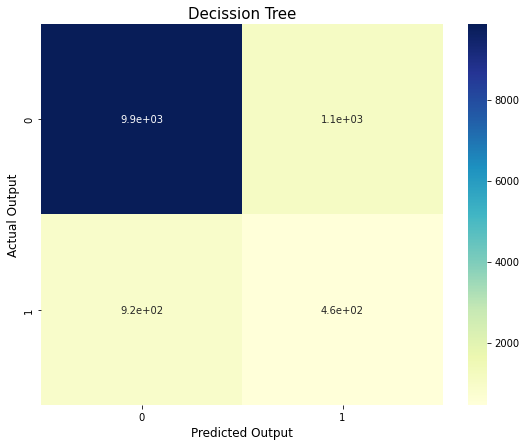

In [41]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_tree, annot=True, cmap='YlGnBu')
plt.title('Decission Tree', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

In [42]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_tree)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.91      0.90      0.91     10975
         yes       0.29      0.34      0.31      1382

    accuracy                           0.84     12357
   macro avg       0.60      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357



# Random Forest

##### Create the model and Training the model

In [43]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

##### Evaluate the model

In [44]:
## get the predicted output
y_pred_forest = forest.predict(x_test)

##### Get the accuracy score

In [45]:
## accuracy score for data train
forest.score(x_train, y_train)

0.9943810481773091

In [46]:
## accuracy score for data test
forest.score(x_test, y_test)

0.8931779558145181

##### Get the confussion matrix and visualize it

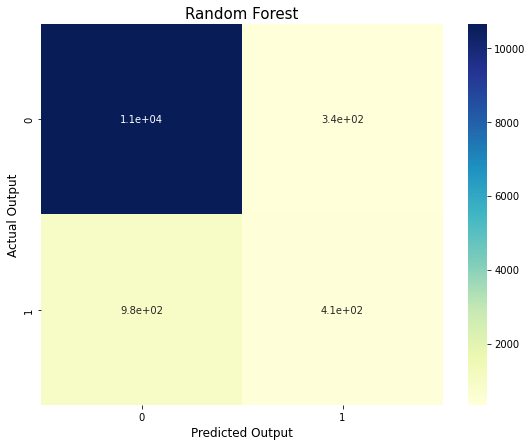

In [47]:
cm_forest = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_forest, annot=True, cmap='YlGnBu')
plt.title('Random Forest', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

In [48]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_forest)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     10975
         yes       0.54      0.29      0.38      1382

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



# Naive Bayes

##### Create the model and Training the model

In [49]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

##### Evaluate the model

In [50]:
## get the predicted output
y_pred_nb = nb.predict(x_test)

##### Get the accuracy score

In [51]:
## accuracy score for data train
nb.score(x_train, y_train)

0.8346918247719468

In [52]:
## accuracy score for data test
nb.score(x_test, y_test)

0.8307032451242211

##### Get the confusion matrix and visualize it

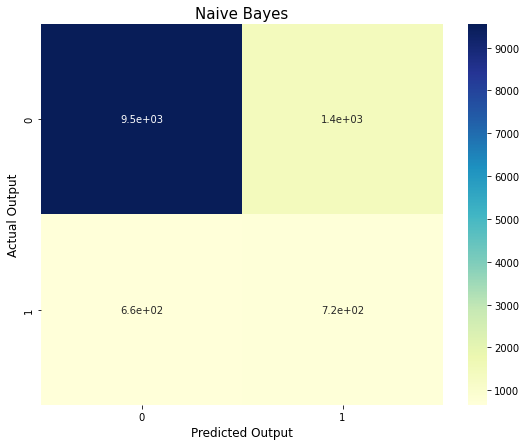

In [53]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(9, 7))
sb.heatmap(cm_nb, annot=True, cmap='YlGnBu')
plt.title('Naive Bayes', fontsize=15)
plt.xlabel("Predicted Output", fontsize=12)
plt.ylabel("Actual Output", fontsize=12)
plt.show()

In [54]:
print("Classification Report : \n", f'\n {classification_report(y_test, y_pred_nb)}')

Classification Report : 
 
               precision    recall  f1-score   support

          no       0.94      0.87      0.90     10975
         yes       0.34      0.52      0.41      1382

    accuracy                           0.83     12357
   macro avg       0.64      0.70      0.65     12357
weighted avg       0.87      0.83      0.85     12357



# Summary Classification Report

In [55]:
print("Classification Report of Logistic Regression : \n", f'\n {classification_report(y_test, y_pred_logreg)} \n======================================================')
print("Classification Report K-Nearest Neighbors : \n", f'\n {classification_report(y_test, y_pred_knn)} \n======================================================')
print("Classification Report Support Vector Machine : \n", f'\n {classification_report(y_test, y_pred_svm)} \n======================================================')
print("Classification Report Decission Tree : \n", f'\n {classification_report(y_test, y_pred_tree)} \n======================================================')
print("Classification Report Random Forest : \n", f'\n {classification_report(y_test, y_pred_forest)} \n======================================================')
print("Classification Report Naive Bayes: \n", f'\n {classification_report(y_test, y_pred_nb)} \n======================================================')

Classification Report of Logistic Regression : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.69      0.19      0.29      1382

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357
 
Classification Report K-Nearest Neighbors : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.67      0.20      0.31      1382

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357
 
Classification Report Support Vector Machine : 
 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     10975
         yes       0.64      0.21      0.31      1382

    accuracy                  

# Summary of Accuracy Score

In [56]:
print(f'Accuracy Score of Logistic Regression    : {logreg.score(x_test, y_test)}')
print(f'Accuracy Score of K-Nearest Neighbors    : {knn.score(x_test, y_test)}')
print(f'Accuracy Score of Support Vector Machine : {svm.score(x_test, y_test)}')
print(f'Accuracy Score of Decission Tree         : {tree.score(x_test, y_test)}')
print(f'Accuracy Score of Random Forest          : {forest.score(x_test, y_test)}')
print(f'Accuracy Score of Naive Bayes            : {nb.score(x_test, y_test)}')

Accuracy Score of Logistic Regression    : 0.8995710933074371
Accuracy Score of K-Nearest Neighbors    : 0.8994901675163874
Accuracy Score of Support Vector Machine : 0.8983572064416929
Accuracy Score of Decission Tree         : 0.8352350894229991
Accuracy Score of Random Forest          : 0.8931779558145181
Accuracy Score of Naive Bayes            : 0.8307032451242211


# Analysis

- As we can see from the summary of accuracy that we got 4 best model to use :
    - Logistic Regression (0.8995)
    - K-Nearest Neighbors (0.8994)
    - Support Vector Machine (0.8983)
    - Random Forest (0.8935)
- Costumer with 'admin.' has the highest subscribed a term deposit
- Costumer with marital status 'married' has the highest subscribed a term deposit
- Costumer that has Housing Loan has the highest subscribed a term deposit